# Charts and Tables

`matplotlib` can be used to create simple charts (histograms, line charts, etc.). See: https://matplotlib.org/

`pandas` can be used for data frames (tables).

## Create some data

In [10]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt


# create some artificial performance data for 3 agents and 100 runs of a O(n^2) algorithm 
# create data for problem size n = 1 .. 100.
n_max = 100
runtime = {
    "agent 1" : np.add(np.power(np.divide(range(n_max), 10), 2), np.random.normal(loc = 0, scale = 10, size = n_max)),
    "agent 2" : np.add(np.power(np.divide(range(n_max),  5), 2), np.random.normal(loc = 0 , scale = 10, size = n_max)),
    "agent 3" : np.add(np.power(np.divide(range(n_max), 12), 2), np.random.normal(loc = 0 , scale = 10, size = n_max))
}

# show data as a data frame using pandas
df = pd.DataFrame(runtime)
df

,agent 1,agent 2,agent 3
0,-7.802091,14.630205,-11.679623
1,-0.787360,15.163978,6.089524
2,-2.064029,16.636955,-23.778030
3,-5.559786,13.214218,8.408119
4,0.759811,-20.925207,8.161285
...,...,...,...
95,101.348987,350.509125,65.186141
96,84.423029,374.058489,68.562616
97,100.025792,377.219186,73.035289
98,94.758717,393.155916,66.020240


In [11]:
# create data for n = 10 and N = 100 replications, so we can compare distributions.
N = 100
performance = {
    "agent 1" : np.add(100, np.random.normal(loc = 0, scale = 10, size = N)),
    "agent 2" : np.add(120, np.random.normal(loc = 0, scale = 20, size = N)),
    "agent 3" : np.add(70,  np.random.normal(loc = 0, scale =  5, size = N))
}

# show data as a data frame using pandas
df = pd.DataFrame(performance)
df

,agent 1,agent 2,agent 3
0,100.562346,118.413708,69.645420
1,90.561737,127.785001,59.934644
2,105.661504,127.067192,62.620640
3,83.550130,99.969414,66.662657
4,109.387156,117.012362,70.716987
...,...,...,...
95,92.104623,121.230595,73.212836
96,92.707108,97.867132,73.556773
97,104.521927,157.685350,79.867146
98,100.274658,118.708218,78.231346


## Charts 

### Line plot

Plot run time as a function of problem size $n = 1, ..., $

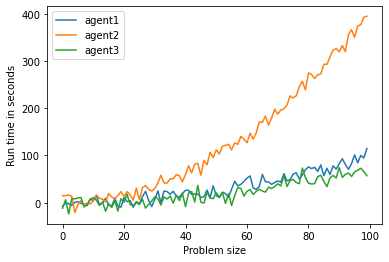

In [12]:
x = range(N)
plt.plot(x, runtime["agent 1"], label = "agent1") 
plt.plot(x, runtime["agent 2"], label = "agent2") 
plt.plot(x, runtime["agent 3"], label = "agent3") 
plt.xlabel("Problem size")
plt.ylabel("Run time in seconds")
plt.legend()
plt.show()

### Scatter plot

Compare $N$ runs of a fixed problem size of $n=10$.

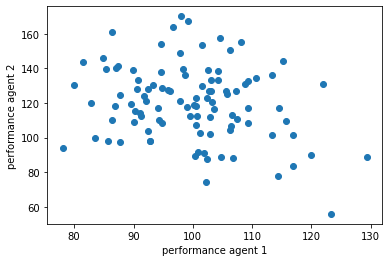

In [13]:
plt.scatter(performance["agent 1"], performance["agent 2"]) 
plt.xlabel("performance agent 1")
plt.ylabel("performance agent 2")
plt.show()

### Bar plot

Compare the average performance performance.

Mean performance: [ 99.74651626 120.12838023  70.4278374 ]


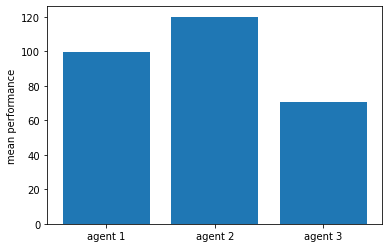

In [14]:
mean_performance = np.mean(list(performance.values()), axis = 1)

print(f"Mean performance: {mean_performance}")

plt.bar(performance.keys(), mean_performance)
plt.ylabel("mean performance")
plt.show()

### Histogram

Show the distribution of the performance.

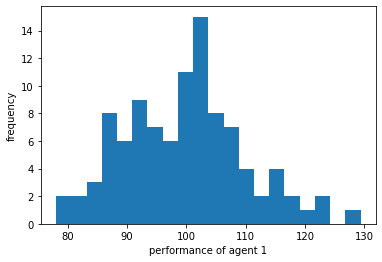

In [15]:
plt.hist(performance["agent 1"], bins = 20)
plt.xlabel("performance of agent 1")
plt.ylabel("frequency")
plt.show()

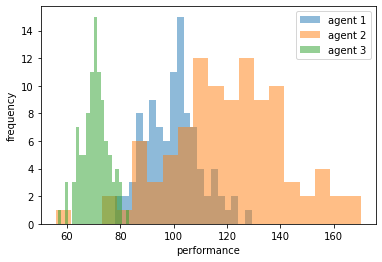

In [16]:
plt.hist(performance["agent 1"], bins = 20, alpha = .5)
plt.hist(performance["agent 2"], bins = 20, alpha = .5)
plt.hist(performance["agent 3"], bins = 20, alpha = .5)
plt.xlabel("performance")
plt.ylabel("frequency")
plt.legend(labels = ["agent 1", "agent 2", "agent 3"])
plt.show()

### Boxplot

To compare distributions.

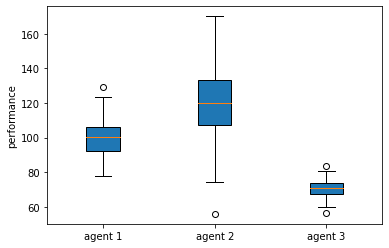

In [17]:
bplot = plt.boxplot(list(performance.values()),
                     vert = True,                  # vertical box alignment
                     patch_artist = True,          # fill with color
                     labels = performance.keys())  # will be used to label x-ticks
plt.ylabel("performance")
plt.show()

## Show Tables

Markdown tables can be produced using markdown syntax (see https://www.markdownguide.org/extended-syntax/):

```
| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |
```

Here is the resulting table

| x   | y    |
| --- | ---- |
| 1.1 | 12.3 |
| 0.8 | 18.0 |

Tables in code can be printed in several ways. The easiest is to use `pandas` dataframes. Unfortunately, it cannot print custom row names.

In [18]:
import numpy as np

data = np.array([[1, 2], [3 ,4], [5, 6]])

print(data)



[[1 2]
 [3 4]
 [5 6]]


In [19]:
import pandas as pd
pd.DataFrame(data, columns=["x", "y"])

,x,y
0,1,2
1,3,4
2,5,6
